# Токенизация данных с использованием библиотеки NLTK

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

PATH = r"D:\split_by_OKPD"
CLASS_COLUMN = "group"

COLS = ["Номер", "Наименование поставщика", "Наименование заказчика", "Регион заказчика", "Исполнение", 
        "Предмет закупки","Цена контракта", "Стоимость обязательств", "Описание ОКПД", "Код ОКПД"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aleksei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aleksei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aleksei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aleksei\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aleksei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
filenames = [os.path.join(PATH, fn) for fn in os.listdir(PATH)]
filenames[:3]

['D:\\split_by_OKPD\\0.00.csv',
 'D:\\split_by_OKPD\\0.01.csv',
 'D:\\split_by_OKPD\\0.02.csv']

In [3]:
okpd_codes = [os.path.splitext(os.path.basename(fn))[0] for fn in filenames]
print(okpd_codes)

['0.00', '0.01', '0.02', '0.04', '0.70', '01.1', '01.2', '01.3', '01.4', '01.6', '01.7', '02.1', '02.2', '02.3', '02.4', '03.1', '03.2', '05.1', '05.2', '06.1', '06.2', '07.1', '07.2', '08.1', '08.9', '09.1', '09.9', '10.1', '10.2', '10.3', '10.4', '10.5', '10.6', '10.7', '10.8', '10.9', '11.0', '12.0', '13.1', '13.2', '13.3', '13.9', '14.1', '14.2', '14.3', '15.1', '15.2', '16.1', '16.2', '17.1', '17.2', '18.1', '18.2', '19.1', '19.2', '19.3', '20.1', '20.2', '20.3', '20.4', '20.5', '20.6', '21.1', '21.2', '22.1', '22.2', '23.1', '23.2', '23.3', '23.4', '23.5', '23.6', '23.7', '23.9', '24.1', '24.2', '24.3', '24.4', '24.5', '25.1', '25.2', '25.3', '25.4', '25.5', '25.6', '25.7', '25.9', '26.1', '26.2', '26.3', '26.4', '26.5', '26.6', '26.7', '26.8', '27.1', '27.2', '27.3', '27.4', '27.5', '27.9', '28.1', '28.2', '28.3', '28.4', '28.9', '29.1', '29.2', '29.3', '30.1', '30.2', '30.3', '30.4', '30.9', '31.0', '32.1', '32.2', '32.3', '32.4', '32.5', '32.9', '33.1', '33.2', '35.1', '35.2',

## Выбираем только интересующие нас коды ОКПД

In [4]:
# 0 Строительно-монтажные работы (СМР) - 41, 42, 43(кроме нижеперечисленных) 
# 1 Проектно-изыскательские работы (ПИР) - 41.1, 71.1 
# 2 Подключение коммуникаций - 43.22 
# 3 Строительный надзор – четкой группы нет -> класс игнорируем

USED_CODES = [['41.2', '42.1', '42.2', '42.9', '43.1', '43.3', '43.9'], 
              ['41.1', '71.1'], 
              ['43.2']]

In [5]:
whole_df = None
for code, fn in zip(okpd_codes, filenames):
    for i in range(len(USED_CODES)):
        if code in USED_CODES[i]:
            df = pd.read_csv(fn, index_col=1)
            df.columns = COLS
            df[CLASS_COLUMN] = i
            if whole_df is None:
                whole_df = df
            else:
                whole_df = pd.concat([whole_df, df])

C:\Users\Aleksei\AppData\Local\Temp\ipykernel_12364\4168448817.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, index_col=1)
C:\Users\Aleksei\AppData\Local\Temp\ipykernel_12364\4168448817.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, index_col=1)
C:\Users\Aleksei\AppData\Local\Temp\ipykernel_12364\4168448817.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, index_col=1)
C:\Users\Aleksei\AppData\Local\Temp\ipykernel_12364\4168448817.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, index_col=1)
C:\Users\Aleksei\AppData\Local\Temp\ipykernel_12364\4168448817.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.r

In [6]:
whole_df.head()

,Номер,Наименование поставщика,Наименование заказчика,Регион заказчика,Исполнение,Предмет закупки,Цена контракта,Стоимость обязательств,Описание ОКПД,Код ОКПД,group
Unnamed: 0,,,,,,,,,,,
16663,0,"АКЦИОНЕРНОЕ ОБЩЕСТВО \ТРАНСИНЖСТРОЙ\""""","ФКУ \РЕАБИЛИТАЦИОННЫЙ ЦЕНТР\""""",Город Москва столица Российской Федерации горо...,<НЕ ОПРЕДЕЛЕНО>,федеральный бюджет,\N,2550640.0,Здания и работы по возведению зданий,41.1,1
24165,1,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \СТРО...,\N,Свердловская область,Оказание услуг по разработке проектной докумен...,федеральный бюджет,871000.00,866645.0,Здания и работы по возведению зданий,41.1,1
24166,2,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \СТРО...,\N,Свердловская область,Оказание услуг по разработке проектной докумен...,федеральный бюджет,871000.00,866645.0,Здания и работы по возведению зданий,41.1,1
24566,3,ФЕДЕРАЛЬНОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ \ГЛАВНОЕ УПР...,ФКУ УПРДОР МОСКВА-БОБРУЙСК,Калужская область,<НЕ ОПРЕДЕЛЕНО>,федеральный бюджет,\N,4652099.53,Здания и работы по возведению зданий,41.1,1
40500,4,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ \БАШС...,"ГБУ \РГЦ\""""",Республика Башкортостан,Выполнение работ по разработке проектной докум...,\N,390000.00,390000.0,Здания и работы по возведению зданий,41.1,1


<Axes: >

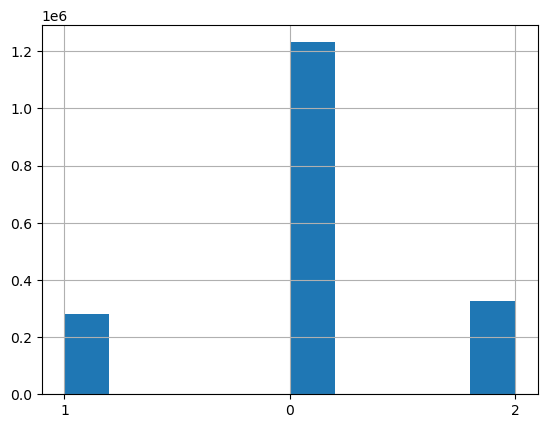

In [7]:
whole_df["group"].astype(str).hist()

In [8]:
whole_df[["Описание ОКПД", "Код ОКПД"]].drop_duplicates()

,Описание ОКПД,Код ОКПД
Unnamed: 0,,
16663,Здания и работы по возведению зданий,41.1
26715343,41.1,41.1
26720292,<НЕ ОПРЕДЕЛЕНО>,41.1
27017142,A,41.1
27495086,N,41.1
...,...,...
26835681,N,71.1
27112923,V,71.1
27609326,T,71.1


In [9]:
unique_descriptions = whole_df["Описание ОКПД"].unique()
unique_descriptions

array(['Здания и работы по возведению зданий', '41.1', '<НЕ ОПРЕДЕЛЕНО>',
       'A', 'N', 'V', 'P', 'F', 'B', 'G', '41.2', 'E',
       'Сооружения и строительные работы в области гражданского строительства',
       '42.1', 'R', 'L', 'J', '42.2', '42.9', 'T',
       'Работы строительные специализированные', '43.1', '43.2', '43.3',
       '43.9',
       'Услуги в области архитектуры и инженерно-технического проектирования, технических испытаний, исследований и анализа',
       '71.1', 'S', 'D'], dtype=object)

In [10]:
pairs = {}
for descr in unique_descriptions:
    pairs[descr] = set(whole_df[whole_df["Описание ОКПД"] == descr]["Код ОКПД"].values)

In [11]:
pairs

{'Здания и работы по возведению зданий': {41.1, 41.2},
 '41.1': {41.1},
 '<НЕ ОПРЕДЕЛЕНО>': {41.1,
  41.2,
  42.1,
  42.2,
  42.9,
  43.1,
  43.2,
  43.3,
  43.9,
  71.1},
 'A': {41.1, 41.2, 42.9, 43.3, 43.9, 71.1},
 'N': {41.1, 41.2, 43.2, 43.9, 71.1},
 'V': {41.1, 42.1, 71.1},
 'P': {41.1, 41.2, 42.9, 43.2, 43.3, 43.9, 71.1},
 'F': {41.1, 41.2, 42.1, 42.2, 42.9, 43.1, 43.2, 43.9, 71.1},
 'B': {41.1, 42.1, 42.9, 71.1},
 'G': {41.1, 41.2, 42.2, 42.9, 43.9, 71.1},
 '41.2': {41.2},
 'E': {41.2, 42.9, 43.3, 43.9, 71.1},
 'Сооружения и строительные работы в области гражданского строительства': {42.1,
  42.2,
  42.9},
 '42.1': {42.1},
 'R': {42.1, 42.2, 43.2, 71.1},
 'L': {42.1},
 'J': {42.1, 42.9},
 '42.2': {42.2},
 '42.9': {42.9},
 'T': {42.9, 71.1},
 'Работы строительные специализированные': {43.1, 43.2, 43.3, 43.9},
 '43.1': {43.1},
 '43.2': {43.2},
 '43.3': {43.3},
 '43.9': {43.9},
 'Услуги в области архитектуры и инженерно-технического проектирования, технических испытаний, исследован

In [12]:
whole_df = whole_df[whole_df["Стоимость обязательств"] != '\\N']

In [13]:
whole_df[whole_df["Стоимость обязательств"] == '\\N']

,Номер,Наименование поставщика,Наименование заказчика,Регион заказчика,Исполнение,Предмет закупки,Цена контракта,Стоимость обязательств,Описание ОКПД,Код ОКПД,group
Unnamed: 0,,,,,,,,,,,


In [14]:
whole_df["group"] = whole_df["group"].astype(str)
whole_df["Стоимость обязательств"] = whole_df["Стоимость обязательств"].astype(float)
whole_df["Стоимость обязательств_log10"] = np.log10(whole_df[["Стоимость обязательств"]].values)

C:\Users\Aleksei\AppData\Local\Temp\ipykernel_12364\497565923.py:3: RuntimeWarning: divide by zero encountered in log10
  whole_df["Стоимость обязательств_log10"] = np.log10(whole_df[["Стоимость обязательств"]].values)


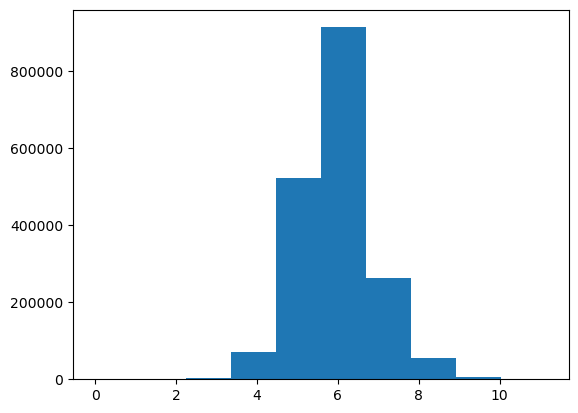

In [15]:
plt.hist(whole_df[whole_df["Стоимость обязательств_log10"] > 0]["Стоимость обязательств_log10"]);

Text(0.5, 1.0, 'Цена контракта, логарифмированная шкала')

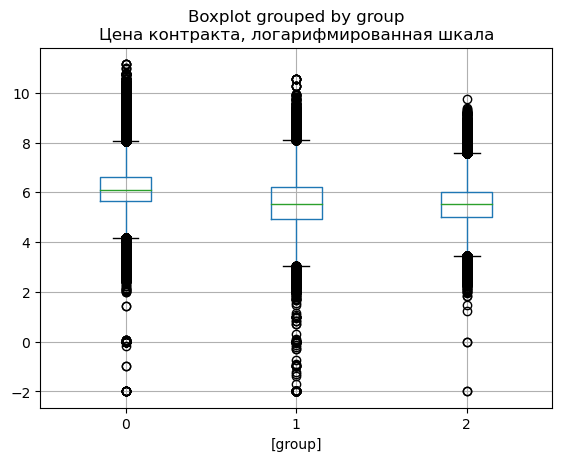

In [16]:
whole_df[["Стоимость обязательств_log10", "group"]].boxplot(by="group")
plt.title("Цена контракта, логарифмированная шкала")

In [17]:
whole_df = whole_df[whole_df["Исполнение"] != "<НЕ ОПРЕДЕЛЕНО>"]
words_df = whole_df[["Исполнение", "group"]]

In [18]:
words_df

,Исполнение,group
Unnamed: 0,,
24165,Оказание услуг по разработке проектной докумен...,1
24166,Оказание услуг по разработке проектной докумен...,1
40500,Выполнение работ по разработке проектной докум...,1
42326,Разработка проектной документации по объекту: ...,1
44031,Выполнение работ по подготовке проектно-сметно...,1
...,...,...
9998520,Разработка проектно-сметной документации по об...,1
9999134,Оказание услуг по разработке проектов внесения...,1
9999349,Оказание услуг по разработке рабочей и проектн...,1


### Разделение слов можно удалить

In [19]:
def get_top_n_words(array, n):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    res = []
    seq = [word_tokenize(entry.lower()) for entry in array]
    for index,entry in enumerate(seq):
        final_words = []
        word_lemmatized = WordNetLemmatizer()
        for word, tag in nltk.pos_tag(entry):
            if word not in stopwords.words("russian") and word.isalpha():
                word_final = word_lemmatized.lemmatize(word, tag_map[tag[0]])
                final_words.append(word_final)
        res += final_words
    
    return list(pd.value_counts(res)[:n].items())

In [ ]:
res_dict = {}
for group in ('0', '1', '2', '3'):
    tmp_arr = words_df[words_df["group"] == group].values[:, 0]
    words = get_top_n_words(tmp_arr, 20)
    res_dict[group] = words

In [ ]:
words = [w for w, c in res_dict["0"]]
count = [c for w, c in res_dict["0"]]
plt.bar(words, count)
plt.xticks(rotation=75)
plt.title("Строительно-монтажные работы (СМР)");

In [ ]:
words = [w for w, c in res_dict["1"]]
count = [c for w, c in res_dict["1"]]
plt.bar(words, count)
plt.xticks(rotation=75)
plt.title("Проектно-изыскательские работы (ПИР) ");

In [ ]:
words = [w for w, c in res_dict["2"]]
count = [c for w, c in res_dict["2"]]
plt.bar(words, count)
plt.xticks(rotation=75)
plt.title("Подключение коммуникаций");